In [262]:
# ipython reload capabilities for edits to external code
%load_ext autoreload
%autoreload 2

import numpy as np

from scipy.interpolate import UnivariateSpline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
# plotting elements
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
cmap = cm.RdBu_r

In [32]:
from exptool.utils import kde_3d

X11 = np.genfromtxt('../Shells/Xue11BHB.txt',\
                        dtype={'names': ("RA","Dec","Glon","Glat",\
                                         "gmag","ug","gr","D0.2","fm",\
                                         "cHg","bHg","d","r",\
                                         "x","y","z","HRV",\
                                         "eHRV","Vgal","DR8","Sloan",\
                                         "SimbadName"),\
                             'formats': ('f8','f8','f8','f8',\
                                        'f8','f8','f8','f8','f8',\
                                        'f8','f8','f8','f8',\
                                        'f8','f8','f8','f8',\
                                        'f8','f8','f8','f8',\
                                         'S20')},\
                 skip_header=77,delimiter=';')



bhbl = X11['Glon']
#bhbl[bhbl > 180.] -= 360.


bhbb = X11['Glat']

xx,yy,bhbw = kde_3d.total_kde_two(bhbl,-bhbb,\
                                       gridsize=256,\
                                       #extents=(-180,180.,-90,90),\
                                       extents=(0.,360.,-90,90),\
                                       #weights=PSPDump.mass/np.cos(halob),\
                                       ktype='gaussian',npower=6.)


# print the SDSS map to a file
#f = open('../Shells/sdssmap.txt','w')

xxf = xx.reshape(-1,)
yyf = yy.reshape(-1,)
sdssf = bhbw.reshape(-1,)


def interpolate_map(l,b,xx,yy,bhbw,dens=5.0,verbose=False):

    f = interpolate.RectBivariateSpline(xx[0],yy[:,0],np.abs(np.log10((bhbw.T)+1.e-12)))
    f = interpolate.RectBivariateSpline(xx[0]*np.pi/180.,yy[:,0]*np.pi/180.,np.abs(np.log10((bhbw.T)+1.e-12)))


    #f = interpolate.RectBivariateSpline(xx[0],yy[:,0],np.abs(np.log10(bhbw.T+1.e-12)))



    bhbdens = f.ev(l,b)

    if verbose: plt.plot(bhbdens[bhbdens.argsort()])

    sdss = np.where(bhbdens<dens)
    sdssflag = np.zeros(l.size)
    sdssflag[bhbdens<dens] += 1

    return sdssflag


#plt.contour(xx,yy,np.abs(np.log10((bhbw)+1.e-12)),[5.0])

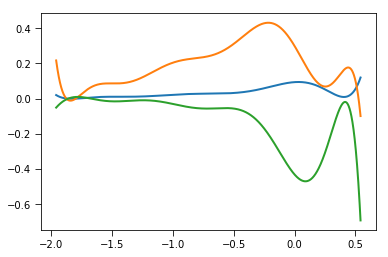

In [200]:
MW = np.genfromtxt(indir+'mw.orient.run068s16a')
MWt  = MW[:,0]
MWx  = MW[:,15]
MWy  = MW[:,16]
MWz  = MW[:,17]

best_time = 1.96787 # the real best time
best_time = 1.95812 # the simulation snapshot time

MWt -= best_time

MWxfit = np.polyfit(MWt,MWx,10)
MWxf = np.poly1d(MWxfit)(MWt)
MWvxfit = np.polyder(MWxfit)
MWvx = np.poly1d(MWvxfit)(MWt)
MWvxf = np.poly1d(MWvxfit)

MWyfit = np.polyfit(MWt,MWy,10)
MWyf = np.poly1d(MWyfit)(MWt)
MWvyfit = np.polyder(MWyfit)
MWvy = np.poly1d(MWvyfit)(MWt)
MWvyf = np.poly1d(MWvyfit)

MWzfit = np.polyfit(MWt,MWz,10)
MWzf = np.poly1d(MWzfit)(MWt)
MWvzfit = np.polyder(MWzfit)
MWvz = np.poly1d(MWvzfit)(MWt)
MWvzf = np.poly1d(MWvzfit)

#plt.plot(MWt,MWx)
#plt.plot(MWt,MWxf)

plt.plot(MWt,MWvx)
plt.plot(MWt,MWvy)
plt.plot(MWt,MWvz)




MWvx = UnivariateSpline(MWt,MWx,s=.1).derivative()(MWt)
#MWvy = UnivariateSpline(MWt,MWy,s=.1).derivative()(MWt)
#MWvz = UnivariateSpline(MWt,MWz,s=.1).derivative()(MWt)




#plt.plot(MWt,MWvx)
#plt.plot(MWt,MWvy)
#plt.plot(MWt,MWvz)

[0.0533503] [0.40607] [-0.131149]


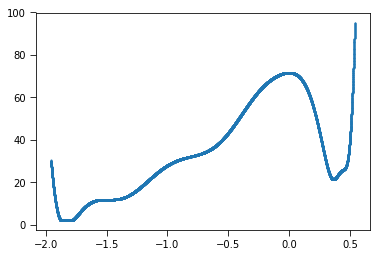

In [244]:
MW = np.genfromtxt(indir+'mw.orient.run068s16a')
MWt  = MW[:,0]
MWx  = MW[:,15]
MWy  = MW[:,16]
MWz  = MW[:,17]


best_time = 1.96787 # the real best time
best_time = 1.95812 # the simulation snapshot time

MWt -= best_time
print(MWx[MWt==0.],MWy[MWt==0.],MWz[MWt==0.])



LMC = np.genfromtxt(indir+'lmc.orient.run068s16a')
LMCx  = LMC[:,15]-MWx[MWt==0.]
LMCy  = LMC[:,16]-MWy[MWt==0.]
LMCz  = LMC[:,17]-MWz[MWt==0.]

rcurr = np.sqrt((LMCx)**2. +\
                (LMCy)**2. +\
                (LMCz)**2.)



tvel = np.sqrt(MWvx*MWvx + MWvy*MWvy + MWvz*MWvz)

#plt.plot(MWt,282.*rcurr)

plt.scatter(MWt,(190./1.4)*tvel,s=1.)

In [250]:
MW = np.genfromtxt(indir+'mw.orient.run068s10s')
MWt  = MW[:,0]

print(MWt[MWt>2.2])

[2.20003 2.20028 2.20053 ... 2.49928 2.49953 2.49978]


In [252]:
MW = np.genfromtxt(indir+'mw.orient.run068s10s')
MWt  = MW[:,0]
MWx  = MW[:,15]
MWy  = MW[:,16]
MWz  = MW[:,17]


best_time = 1.96787 # the real best time
best_time = 1.95812 # the simulation snapshot time
best_time = 2.49928
MWt -= best_time
print(MWx[MWt==0.],MWy[MWt==0.],MWz[MWt==0.])



LMC = np.genfromtxt(indir+'lmc.orient.run068s10s')
LMCx  = LMC[:,15]-MWx[MWt==0.]
LMCy  = LMC[:,16]-MWy[MWt==0.]
LMCz  = LMC[:,17]-MWz[MWt==0.]

rcurr = np.sqrt((LMCx)**2. +\
                (LMCy)**2. +\
                (LMCz)**2.)



#tvel = np.sqrt(MWvx*MWvx + MWvy*MWvy + MWvz*MWvz)

#plt.plot(MWt,282.*rcurr)

#plt.scatter(MWt,(190./1.4)*tvel,s=1.)

[0.157546] [0.448028] [-0.327062]


In [263]:
import reflexmotion.reflex as rm

In [16]:
import reflexmotion.galactic as gt
import reflexmotion.outlog as ol

In [107]:
# this is the most realistic satellite we have
indir = '/Users/mpetersen/Notebooks/Dynamics/Coefficients/data/Disk068/'
#runtag = 'run065s17n'
runtag = 'run068s16a'


OLog = ol.read_outlog(indir,runtag)

xpos_mw = UnivariateSpline(OLog['Time'][:-2],OLog['mw_Rx'][:-2],s=0)(OLog['Time'])
ypos_mw = UnivariateSpline(OLog['Time'][:-2],OLog['mw_Ry'][:-2],s=0)(OLog['Time'])
zpos_mw = UnivariateSpline(OLog['Time'][:-2],OLog['mw_Rz'][:-2],s=0)(OLog['Time'])

xvel_mw = UnivariateSpline(OLog['Time'][:-2],OLog['mw_Rx'][:-2],s=0).derivative()(OLog['Time'])
yvel_mw = UnivariateSpline(OLog['Time'][:-2],OLog['mw_Ry'][:-2],s=0).derivative()(OLog['Time'])
zvel_mw = UnivariateSpline(OLog['Time'][:-2],OLog['mw_Rz'][:-2],s=0).derivative()(OLog['Time'])

xpos_mw_f = UnivariateSpline(OLog['Time'][:-2],OLog['mw_Rx'][:-2],s=0)
ypos_mw_f = UnivariateSpline(OLog['Time'][:-2],OLog['mw_Ry'][:-2],s=0)
zpos_mw_f = UnivariateSpline(OLog['Time'][:-2],OLog['mw_Rz'][:-2],s=0)

xvel_mw_f = UnivariateSpline(OLog['Time'][:-2],OLog['mw_Rx'][:-2],s=0).derivative()
yvel_mw_f = UnivariateSpline(OLog['Time'][:-2],OLog['mw_Ry'][:-2],s=0).derivative()
zvel_mw_f = UnivariateSpline(OLog['Time'][:-2],OLog['mw_Rz'][:-2],s=0).derivative()


xpos_lmc = UnivariateSpline(OLog['Time'][:-2],OLog['lmc_Rx'][:-2],s=0)(OLog['Time'])
ypos_lmc = UnivariateSpline(OLog['Time'][:-2],OLog['lmc_Ry'][:-2],s=0)(OLog['Time'])
zpos_lmc = UnivariateSpline(OLog['Time'][:-2],OLog['lmc_Rz'][:-2],s=0)(OLog['Time'])



tvel = np.sqrt(xvel_mw*xvel_mw + yvel_mw*yvel_mw + zvel_mw*zvel_mw)


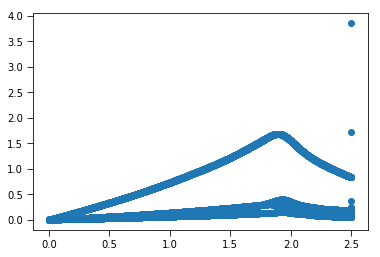

In [109]:
plt.scatter(OLog['Time'],tvel)

In [27]:
from exptool.io import psp_io

In [202]:

live_body_file = '/Volumes/SIMSET/Disk068/OUT.run068s10s1.00045'


live_body_file = '/Volumes/SIMSET/Disk068/OUT.run068s16a.00049'



PSPDump = psp_io.Input(live_body_file,'mw',nout=400000)
PSPLMC = psp_io.Input(live_body_file,'lmc',nout=400000)

print(PSPDump.time)


# pull in the centres from OUTLOG: not the best plan...

#xcen = xpos_mw_f(PSPDump.time)
#ycen = ypos_mw_f(PSPDump.time)
#zcen = zpos_mw_f(PSPDump.time)
#vxcen = xvel_mw_f(PSPDump.time)
#vycen = yvel_mw_f(PSPDump.time)
#vzcen = zvel_mw_f(PSPDump.time)

# from the orient file, and derived:
xcen  = MWx[MWt==0.]
ycen  = MWy[MWt==0.]
zcen  = MWz[MWt==0.]
vxcen = MWvx[MWt==0.]
vycen = MWvy[MWt==0.]
vzcen = MWvz[MWt==0.]

print(xcen,ycen,zcen,vxcen,vycen,vzcen)

PSPDump.xpos -= xcen
PSPDump.ypos -= ycen
PSPDump.zpos -= zcen
PSPDump.xvel -= vxcen
PSPDump.yvel -= vycen
PSPDump.zvel -= vzcen

PSPLMC.xpos -= xcen
PSPLMC.ypos -= ycen
PSPLMC.zpos -= zcen
PSPLMC.xvel -= vxcen
PSPLMC.yvel -= vycen
PSPLMC.zvel -= vzcen

1.9581249999995947
[0.0533503] [0.40607] [-0.131149] [0.06450336] [0.29892915] [-0.43091568]


In [113]:
print(282*np.nanmedian(PSPLMC.xpos),282.*np.nanmedian(PSPLMC.ypos),282*np.nanmedian(PSPLMC.zpos))



-0.6069211475551128 -42.1478174328804 -24.754894629120827


In [104]:
# move the LMC as well

xpos_lmc -= xcen
ypos_lmc -= ycen
zpos_lmc -= zcen

dLjl,dBjl,radjl,vrjl,dmuljl,dmubjl = gt.galactic(distscale*xpos_lmc-sol_pos[0],\
                                                 distscale*ypos_lmc-sol_pos[1],\
                                                 distscale*zpos_lmc-sol_pos[2],\
                                                 0.*xpos_lmc-sol_vel[0],\
                                                 0.*xpos_lmc-sol_vel[1],\
                                                 0.*xpos_lmc-sol_vel[2])


print(282*np.nanmedian(xpos_lmc),282.*np.nanmedian(ypos_lmc),282*np.nanmedian(zpos_lmc))
print(np.nanmedian(dLjl),np.nanmedian(dBjl))

-137.89201330108548 -518.8303521643295 177.1318402559032
255.8694890666718 17.254473195642483


In [89]:
PSPDump.mass

array([9.1031609e-08, 1.2651083e-07, 5.5229572e-09, ..., 6.4453353e-08,
       1.3853993e-07, 9.5175970e-08], dtype=float32)

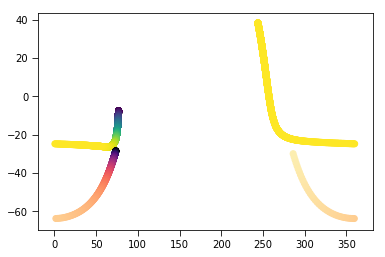

In [254]:
import matplotlib.cm as cm

dLsat = (180./np.pi)*np.arctan2(LMCy,LMCx)
dBsat = (180./np.pi)*np.arcsin(LMCz/np.sqrt(rcurr))

dLsat[dLsat<0.] += 360.
plt.scatter(dLsat,dBsat,color=cm.viridis((MWt+best_time)/2.,1.))

f = open('/Users/mpetersen/Downloads/newtraj.txt','w')

for i in range(0,MWt.size):
    print(MWt[i]+best_time,dLsat[i],dBsat[i],file=f)
    
f.close()


#plt.scatter(dLjl[OLog['Time']==2.24],dBjl[OLog['Time']==2.24],color='black',s=20.,marker='*')
sat = 'sat14'
In = np.genfromtxt('/Users/mpetersen/Dropbox/mike/Models_20April/'+sat+'_trajectory_tnow.txt',skip_header=1)

ttraj = In[:,0]
xtraj = In[:,1][ttraj<0]
ytraj = In[:,2][ttraj<0]
ztraj = In[:,3][ttraj<0]

rcurr2 = np.sqrt(xtraj*xtraj + ytraj*ytraj + ztraj*ztraj)
dLsat2 = (180./np.pi)*np.arctan2(ytraj,xtraj)
dBsat2 = (180./np.pi)*np.arcsin(ztraj/rcurr2)

dLsat2[dLsat2<0.] += 360.

plt.scatter(dLsat2,dBsat2,color=cm.magma((ttraj[ttraj<0]-np.nanmin(ttraj))/2.2,1.))





In [203]:
### transform to solar position

heliocentric = True

sol_pos = [-8.3,0.,0.03]
sol_vel = [11.1,244.24,7.25]

#origin = [282.*MWx[MWt==0.],282.*MWy[MWt==0.],282.*MWz[MWt==0.]]
#print(origin)

distscale = 282.
velscale = (190./1.4)

dLjh,dBjh,radjh,vrjh,dmuljh,dmubjh = gt.galactic(distscale*PSPDump.xpos-sol_pos[0],\
                                                    distscale*PSPDump.ypos-sol_pos[1],\
                                                    distscale*PSPDump.zpos-sol_pos[2],\
                                                     velscale*PSPDump.xvel-sol_vel[0],\
                                                     velscale*PSPDump.yvel-sol_vel[1],\
                                                     velscale*PSPDump.zvel-sol_vel[2])

dLj,dBj,radj,vrj,dmulj,dmubj = gt.galactic(distscale*PSPDump.xpos,\
                                           distscale*PSPDump.ypos,\
                                           distscale*PSPDump.zpos,\
                                           velscale*PSPDump.xvel,\
                                           velscale*PSPDump.yvel,\
                                           velscale*PSPDump.zvel,)



dLjlh,dBjlh,radjlh,vrjlh,dmuljlh,dmubjlh = gt.galactic(distscale*PSPLMC.xpos-sol_pos[0],\
                                                       distscale*PSPLMC.ypos-sol_pos[1],\
                                                       distscale*PSPLMC.zpos-sol_pos[2],\
                                                       velscale*PSPLMC.xvel-sol_vel[0],\
                                                       velscale*PSPLMC.yvel-sol_vel[1],\
                                                       velscale*PSPLMC.zvel-sol_vel[2])




In [209]:
print(MWt[(MWt<0.) & (MWt>-0.01)])

[-0.00987 -0.00975 -0.00962 -0.0095  -0.00937 -0.00925 -0.00912 -0.009
 -0.00887 -0.00875 -0.00862 -0.0085  -0.00837 -0.00825 -0.00812 -0.008
 -0.00787 -0.00775 -0.00762 -0.0075  -0.00737 -0.00725 -0.00712 -0.007
 -0.00687 -0.00675 -0.00662 -0.0065  -0.00637 -0.00625 -0.00612 -0.006
 -0.00587 -0.00575 -0.00562 -0.0055  -0.00537 -0.00525 -0.00512 -0.005
 -0.00487 -0.00475 -0.00462 -0.0045  -0.00437 -0.00425 -0.00412 -0.004
 -0.00387 -0.00375 -0.00362 -0.0035  -0.00337 -0.00325 -0.00312 -0.003
 -0.00287 -0.00275 -0.00262 -0.0025  -0.00237 -0.00225 -0.00212 -0.002
 -0.00187 -0.00175 -0.00162 -0.0015  -0.00137 -0.00125 -0.00112 -0.001
 -0.00087 -0.00075 -0.00062 -0.0005  -0.00037 -0.00025 -0.00012]


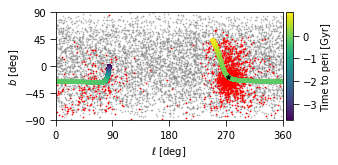

In [240]:
from scipy import interpolate


fig = plt.figure(figsize=(5,2))

ax = fig.add_axes([0.17,0.23,0.63,0.75])
ax2 = fig.add_axes([0.81,0.23,0.02,0.75])
sdssflag = interpolate_map(dLj*(np.pi/180.),dBj*(np.pi/180.),xx,yy,bhbw,dens=5.0,verbose=False)


ax.scatter(dLj[0:6000],dBj[0:6000],color='gray',s=0.5,alpha=0.5)
#ax.scatter(dLj[sdssflag==1][0:2000],dBj[sdssflag==1][0:2000],color='black',s=1.)
ax.scatter(dLjlh[0:2000],dBjlh[0:2000],edgecolor='red',s=0.5,marker='o')



ax.scatter(dLsat,dBsat,color=cm.viridis((MWt+best_time)/2.5,1.),s=10.)

ax.scatter(dLsat[np.nanargmin(np.abs(MWt+0.04))],dBsat[np.nanargmin(np.abs(MWt+0.04))],color='black',s=20.,marker='*')


#ax.scatter(dLjl[OLog['Time']==best_time],dBjl[OLog['Time']==best_time],color='black',s=20.,marker='*')


ax.axis([0.,360.,-90.,90])
ax.set_yticks([-90.,-45.,0.,45.,90])
ax.set_xticks([0,90.,180.,270.,360.])


ax.set_xlabel('$\ell$ [deg]',size=10)
ax.set_ylabel('$b$ [deg]',size=10)

cmap = cm.viridis; norm = mpl.colors.Normalize(vmin=-(best_time*1.9), vmax=(np.nanmax(MWt*1.9)))
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Time to peri [Gyr]',size=10)
cb1.set_ticks([-3.,-2.,-1.,0.])

fig.tight_layout()
plt.savefig('/Users/mpetersen/Dropbox/mike/Models_20April/m68s16a_t49snapshot.png',dpi=300)


In [230]:
dLsat[np.nanargmin(np.abs(MWt-0.00012))]

267.54047984926376

In [212]:

from scipy.interpolate import interp1d

def draw_sources(radk,numk,radj,nsources = 15000):
    """ draw sources from an input distribution to match a specified distribution
    
    inputs
    ---------
    radk     : 
    numk     :
    radj     :
    nsources :
    
    """
    # interpolate the input distribution
    
    spl = interp1d(numk,radk,'nearest')
    
    used = np.zeros(nsources,dtype='int')
    desdist = np.zeros(nsources)

    for i in range(0,nsources):
        #if i%1500==0:print(i)
        r = np.random.rand()
        desired_dist = spl(r)
        desdist[i] = desired_dist

        # set up a distance tolerance of 1%.
        # should this be converted to a heliocentric distance?
        w = np.where( (radj > 0.99*desired_dist) & (radj < 1.01*desired_dist))[0]

        # randomly select a star from the list
        t = np.random.choice(w)

        draws = 0
        while t in used:
            t = np.random.choice(w)
            draws+=1
            if draws==w.size:
                print('failure',w.size)
                t = 1000000+i

        used[i] = t

    return used,desdist,spl



I = np.genfromtxt('../Shells/kgiantrange.txt')
radk = I[:,0]; numk = I[:,1]

used,desdist,spl = draw_sources(radk,numk,radj,nsources = 15000)

[]

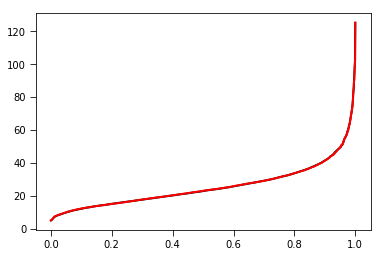

In [213]:
tstdist = np.linspace(0.,1.,1000)
plt.plot(tstdist,spl(tstdist),color='black')

tstdist = np.linspace(0.,1.,desdist.size)
plt.plot(tstdist,desdist[desdist.argsort()],color='red')

plt.plot()

In [214]:


#outfile = '/Users/mpetersen/Dropbox/mike/Models_20April/mock_m68s10s1_t45_heliocentric.txt'

outfile = '/Users/mpetersen/Dropbox/mike/Models_20April/mock_m68s16a_t49_heliocentric.txt'


f = open(outfile,'w')


print('x [kpc]; y [kpc]; z [kpc]; vx [km/s]; vy [km/s]; vz [km/s]; \
     dL [deg]; dB [deg]; dist [kpc]; vlos [km/s]; dmul [marcsec/yr]; dmub [marcsec/yr]; \
      edist[kpc]; evlos [km/s]; edmul [marcsec/yr]; edmub [marcsec/yr]; \
      rapo [kpc]; rapo quality; sdss?',file=f)



# distance-dependent error factors
pmprefac=  0.013
pmprefac=  0.008 # test a down-weighting of uncertainties
dprefac = 0.2
# set up blank rapo and rapoquality
rapo = np.ones(PSPDump.xpos.size)
rapoquality = np.zeros(PSPDump.xpos.size)


for i in used:

    print(np.round(distscale*PSPDump.xpos[i],2),\
          np.round(distscale*PSPDump.ypos[i],2),\
          np.round(distscale*PSPDump.zpos[i],2),\
          np.round( velscale*PSPDump.xvel[i],2),\
          np.round( velscale*PSPDump.yvel[i],2),\
          np.round( velscale*PSPDump.zvel[i],2),\
        np.round(dLjh[i],2),\
          np.round(dBjh[i],2),\
          np.round(radjh[i],2),\
          np.round( vrjh[i],2),\
          np.round( dmuljh[i],4),\
          np.round( dmubjh[i],4),\
        np.round(0.05*radj[i],2),\
          np.round(np.abs(dprefac*radj[i]*np.random.normal()),2),\
          np.round(np.abs(pmprefac*radj[i]*np.random.normal()),4),\
          np.round(np.abs(pmprefac*radj[i]*np.random.normal()),4),\
        np.round( distscale*rapo[i],2),\
          np.round( rapoquality[i],2),\
        int(sdssflag[i]),\
          file=f)
    
f.close()








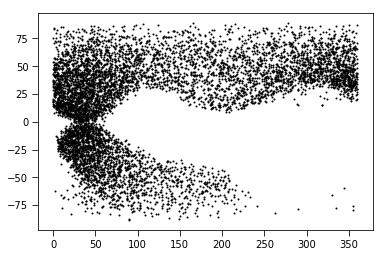

In [215]:


In = np.genfromtxt(outfile,skip_header=1)


x    = In[:,0]
y    = In[:,1]
z    = In[:,2]
u   = In[:,3]
v   = In[:,4]
w   = In[:,5]

l    = In[:,6]
b    = In[:,7]
d    = In[:,8]
vr   = In[:,9]
dml  = In[:,10]
dmb  = In[:,11]

ed   = In[:,12]
evr  = In[:,13]
edml = In[:,14]
edmb = In[:,15]

ra   = In[:,16]
raq  = In[:,17]
sd   = In[:,18]

plt.scatter(l[sd==1],b[sd==1],color='black',s=1.)

In [223]:
print(tpos)

[  0.         182.80558022 197.23962484 204.22406933 205.4708011
 205.96551702 205.62774589 199.4950355  199.04071625 196.75929305
 207.21830071 187.5934949  176.424895   135.08233479          nan
 146.10184918          nan          nan]


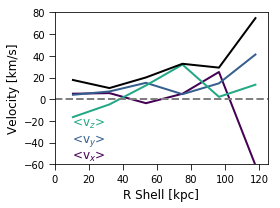

In [229]:

rapo = np.sqrt(x*x + y*y + z*z)



rapovals = np.linspace(0.,150.,8)
xpos = np.zeros(rapovals.size)
ypos = np.zeros(rapovals.size)
zpos = np.zeros(rapovals.size)
tpos = np.zeros(rapovals.size)


dr = 0.5*(rapovals[1]-rapovals[0])

#tvel = np.sqrt(u*u+v*v+w*w)

for irapo,rapolim in enumerate(rapovals):
    if irapo==0:
        continue
    xpos[irapo] = np.nanmean(u[(rapo>rapovals[irapo-1]) & (rapo<rapovals[irapo])])
    ypos[irapo] = np.nanmean(v[(rapo>rapovals[irapo-1]) & (rapo<rapovals[irapo])])
    zpos[irapo] = np.nanmean(w[(rapo>rapovals[irapo-1]) & (rapo<rapovals[irapo])])
    tpos[irapo] = np.sqrt(xpos[irapo]*xpos[irapo]+ypos[irapo]*ypos[irapo]+zpos[irapo]*zpos[irapo])


   

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
    
ax.plot(rapovals[1:]-dr,xpos[1:],color=cm.viridis(0.,1.))
ax.plot(rapovals[1:]-dr,ypos[1:],color=cm.viridis(0.3,1.))
ax.plot(rapovals[1:]-dr,zpos[1:],color=cm.viridis(0.6,1.))
ax.plot(rapovals[1:]-dr,tpos[1:],color='black')



"""
rapo = np.sqrt(x*x + y*y + z*z)

for irapo,rapolim in enumerate(rapovals):
    if irapo==0:
        continue
    #xpos[irapo] = np.nanmedian(u[(rapo>rapovals[irapo-1]) & (rapo<rapovals[irapo])])
    #ypos[irapo] = np.nanmedian(v[(rapo>rapovals[irapo-1]) & (rapo<rapovals[irapo])])
    #zpos[irapo] = np.nanmedian(w[(rapo>rapovals[irapo-1]) & (rapo<rapovals[irapo])])
    xpos[irapo] = np.nanmean(u[(rapo>rapovals[irapo-1]) & (rapo<rapovals[irapo])])
    ypos[irapo] = np.nanmean(v[(rapo>rapovals[irapo-1]) & (rapo<rapovals[irapo])])
    zpos[irapo] = np.nanmean(w[(rapo>rapovals[irapo-1]) & (rapo<rapovals[irapo])])


   

ax.plot(rapovals[1:]-dr,xpos[1:],color=cm.viridis(0.,1.),linestyle='dotted')
ax.plot(rapovals[1:]-dr,ypos[1:],color=cm.viridis(0.3,1.),linestyle='dotted')
ax.plot(rapovals[1:]-dr,zpos[1:],color=cm.viridis(0.6,1.),linestyle='dotted')
"""




ax.text(10.,-55.,'<v$_x$>',size=12,color=cm.viridis(0.,1.))
ax.text(10.,-40.,'<v$_y$>',size=12,color=cm.viridis(0.3,1.))
ax.text(10.,-25.,'<v$_z$>',size=12,color=cm.viridis(0.6,1.))


ax.plot([0.,125.],[0.,0.],color='gray',linestyle='dashed')

ax.axis([0.,125.,-60,80])
ax.set_xlabel('R$_{\\rm apo}$ Shell [kpc]',size=12)
ax.set_xlabel('R Shell [kpc]',size=12)

ax.set_ylabel('Velocity [km/s]',size=12)

fig.tight_layout()
plt.savefig('/Users/mpetersen/Dropbox/mike/Models_20April/vel_centre_m68s16a.png',dpi=300)



In [265]:


rm.make_model

<function reflexmotion.reflex.make_model(phi, theta, psi=0.0, pointres=180, reverse=False, twopi=True, travel='u', flip=False, verbose=False)>

In [266]:
xx,yy,velmap = rm.make_map(l[dcut],b[dcut],vel1[dcut],weight[dcut])
    #velmap[velmap<np.nanmin(velstretch)] = np.nanmin(velstretch)
    #velmap[velmap>np.nanmax(velstretch)] = np.nanmax(velstretch)
    #ax1.contourf(xx,yy,velmap,velstretch,cmap=cm.coolwarm)

IndexError: index 15027 is out of bounds for axis 0 with size 15000

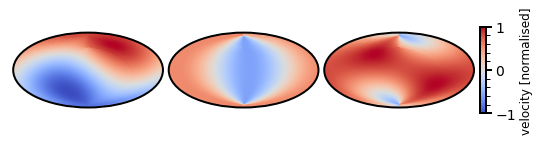

In [273]:
pointres=50

fig = plt.figure(figsize=(8,1.5))

xmin = 0.08
ymin = 0.14
dx = 0.26
dy = 0.80
buffer = 0.01

ax1 = fig.add_axes([xmin+0.*(dx+buffer),ymin+0.*(dy+buffer),dx,dy],projection='aitoff')
ax2 = fig.add_axes([xmin+1.*(dx+buffer),ymin+0.*(dy+buffer),dx,dy],projection='aitoff')
ax3 = fig.add_axes([xmin+2.*(dx+buffer),ymin+0.*(dy+buffer),dx,dy],projection='aitoff')

#ax4 = fig.add_axes([xmin+0.*(dx+buffer),ymin+0.*(dy+buffer),dx,dy])
#ax5 = fig.add_axes([xmin+1.*(dx+buffer),ymin+0.*(dy+buffer),dx,dy])
#ax6 = fig.add_axes([xmin+2.*(dx+buffer),ymin+0.*(dy+buffer),dx,dy])


ax7 = fig.add_axes([xmin+3.*(dx+buffer),ymin+0.*(dy+buffer),0.01,1.*dy])


cmap = cm.coolwarm; norm = mpl.colors.Normalize(vmin=-1., vmax=1.)
cb1 = mpl.colorbar.ColorbarBase(ax7, cmap=cmap,norm=norm)
cb1.set_label('velocity [normalised]',size=12)


velstretch = np.linspace(-32,32,64)

# set up model 2

twopi=False
travel='u'
phi = 285.;theta=145.;psi=0.
#phi = 0.;theta=90.;psi=0.



l,b,dist,mul,mub,vlos = rm.make_model(phi,theta,psi=psi,pointres=pointres,travel=travel,flip=True)
vel = vlos
velstretch = np.linspace(-1.,1.,64)
l[l>np.pi]-=2.*np.pi
ax1.scatter(l,b,color=cm.coolwarm((vel-np.nanmin(velstretch))/(np.nanmax(velstretch)-np.nanmin(velstretch)),1.),s=20.)

vel = rm.undo_proper_motion(mul,dist)
l[l>np.pi]-=2.*np.pi
ax2.scatter(l,b,color=cm.coolwarm((vel-np.nanmin(velstretch))/(np.nanmax(velstretch)-np.nanmin(velstretch)),1.),s=20.)

vel = rm.undo_proper_motion(mub,dist)
l[l>np.pi]-=2.*np.pi
ax3.scatter(l,b,color=cm.coolwarm((vel-np.nanmin(velstretch))/(np.nanmax(velstretch)-np.nanmin(velstretch)),1.),s=20.)


for ax in [ax1,ax2,ax3]:
    ax.set_xticklabels(())
    ax.set_yticklabels(())



In [274]:
pointres

50

Text(180.0, 70.0, '2e11, 80<d<120 kpc')

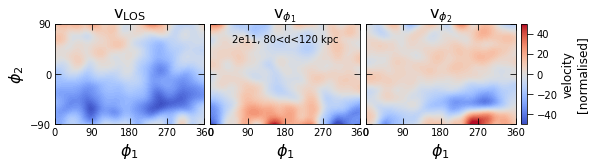

In [85]:

def undo_proper_motion(propermotion,distance):
    """simple transformation from velocity (in km/s) to proper motion in arcsec/yr"""
    
    # convert distance from kpc to pc
    return propermotion*(4.74057*distance*1000.)




def make_map(l,b,vel,weight,twopi=True):
    if twopi:
        xx,yy,velmapv = kde_3d.total_kde_two(l,b,\
                                           gridsize=256,\
                                           extents=(0.,360.,-90,90),\
                                           weights=vel*weight,\
                                           ktype='gaussian',npower=6.)

        xx,yy,velmapw = kde_3d.total_kde_two(l,b,\
                                           gridsize=256,\
                                           extents=(0.,360.,-90,90),\
                                           weights=weight,\
                                           ktype='gaussian',npower=6.)
    else:
        xx,yy,velmapv = kde_3d.total_kde_two(l,b,\
                                           gridsize=256,\
                                           extents=(-180,180.,-90,90),\
                                           weights=vel*weight,\
                                           ktype='gaussian',npower=6.)

        xx,yy,velmapw = kde_3d.total_kde_two(l,b,\
                                           gridsize=256,\
                                           extents=(-180,180.,-90,90),\
                                           weights=weight,\
                                           ktype='gaussian',npower=6.)


    velmap = velmapv/velmapw
    
    return xx,yy,np.flipud(velmap)




def plot_panels(l,b,vel1,vel2,vel3,dcut,velmax=50):

    weight=np.ones(l.size)

    fig = plt.figure(figsize=(8,2))

    xmin = 0.08
    ymin = 0.14
    dx = 0.26
    dy = 0.7
    buffer = 0.01

    ax1 = fig.add_axes([xmin+0.*(dx+buffer),ymin+0.*(dy+buffer),dx,dy])
    ax2 = fig.add_axes([xmin+1.*(dx+buffer),ymin+0.*(dy+buffer),dx,dy])
    ax3 = fig.add_axes([xmin+2.*(dx+buffer),ymin+0.*(dy+buffer),dx,dy])

    #ax1 = fig.add_axes([xmin+0.*(dx+buffer),ymin+1.*(dy+buffer),dx,dy])
    #ax2 = fig.add_axes([xmin+1.*(dx+buffer),ymin+1.*(dy+buffer),dx,dy])
    #ax3 = fig.add_axes([xmin+2.*(dx+buffer),ymin+1.*(dy+buffer),dx,dy])


    #ax4 = fig.add_axes([xmin+0.*(dx+buffer),ymin+0.*(dy+buffer),dx,dy])
    #ax5 = fig.add_axes([xmin+1.*(dx+buffer),ymin+0.*(dy+buffer),dx,dy])
    #ax6 = fig.add_axes([xmin+2.*(dx+buffer),ymin+0.*(dy+buffer),dx,dy])

    #ax7 = fig.add_axes([xmin+3.*(dx+buffer),ymin+0.*(dy+buffer),0.01,2.*dy+buffer])

    ax7 = fig.add_axes([xmin+3.*(dx+buffer),ymin+0.*(dy+buffer),0.01,dy])
    


    velstretch = np.linspace(-velmax,velmax,64)

    cmap = cm.coolwarm; norm = mpl.colors.Normalize(vmin=np.nanmin(velstretch), vmax=np.nanmax(velstretch))
    cb1 = mpl.colorbar.ColorbarBase(ax7, cmap=cmap,norm=norm)
    cb1.set_label('velocity\n[normalised]',size=12)




    xx,yy,velmap = make_map(l[dcut],b[dcut],vel1[dcut],weight[dcut])
    velmap[velmap<np.nanmin(velstretch)] = np.nanmin(velstretch)
    velmap[velmap>np.nanmax(velstretch)] = np.nanmax(velstretch)
    ax1.contourf(xx,yy,velmap,velstretch,cmap=cm.coolwarm)

    xx,yy,velmap = make_map(l[dcut],b[dcut],vel2[dcut],weight[dcut])
    velmap[velmap<np.nanmin(velstretch)] = np.nanmin(velstretch)
    velmap[velmap>np.nanmax(velstretch)] = np.nanmax(velstretch)
    ax2.contourf(xx,yy,velmap,velstretch,cmap=cm.coolwarm)

    xx,yy,velmap = make_map(l[dcut],b[dcut],vel3[dcut],weight[dcut])
    velmap[velmap<np.nanmin(velstretch)] = np.nanmin(velstretch)
    velmap[velmap>np.nanmax(velstretch)] = np.nanmax(velstretch)
    ax3.contourf(xx,yy,velmap,velstretch,cmap=cm.coolwarm)


    for ax in [ax1,ax2,ax3]:
        ax.axis([0.,(180./np.pi)*2.*np.pi,-(180./np.pi)*np.pi/2.,(180./np.pi)*np.pi/2.])
        ax.set_xlabel('$\phi_1$',size=16)


    ax2.set_yticklabels(())
    ax3.set_yticklabels(())

    ax1.set_title('v$_{\\rm LOS}$',size=16)
    ax2.set_title('v$_{\phi_1}$',size=16)
    ax3.set_title('v$_{\phi_2}$',size=16)

    ax1.set_ylabel('$\phi_2$',size=16)
    
    for ax in [ax1,ax2,ax3]:
        _ = ax.yaxis.set_ticks_position('both')
        _ = ax.xaxis.set_ticks_position('both')
        _ = ax.tick_params(axis="both",which='both',direction="in")
        _ = ax.set_xticks([0.,90.,180.,270.,360.])
        _ = ax.set_yticks([-90.,0.,90.])
    
    fig.tight_layout()
    
    return fig

    #plt.savefig('/Users/mpetersen/Downloads/mockoutput200k.png',dpi=300)







#dcut = np.where( (ra>40.) & (ra<150.) & (d>50.) & (d<80.))#& (sdss==1))

lorad = 80.
hirad = 120.
dcut = np.where(  (radj>lorad) & (radj<hirad))# & (rapo[0:radj.size]>70./300.))



fig = plot_panels(dLj,dBj,vrj,\
                  undo_proper_motion(0.001*dmulj,radj),\
                  undo_proper_motion(0.001*dmubj,radj),\
                  dcut,\
                  velmax=50)

ax1,ax2,ax3,ax4 = fig.get_axes()

# mask the SDSS footprint

#for ax in [ax1,ax2,ax3]:
#    ax.contourf(xx,yy,np.log10(bhbw+1.e-11),np.array([-np.inf,-4.9]),colors='white')
#   ax.scatter(TrajL[TrajT<0.95*2.2],TrajB[TrajT<0.95*2.2],color='black',s=3.)
    
    

ax2.text(180.,70.,'2e11, {}<d<{} kpc'.format(int(lorad),int(hirad)),color='black',size=10,va='top',ha='center')

#plt.savefig('/Users/mpetersen/Dropbox/mike/Models_13April/s14_97_d010030_sdss.png',dpi=300)


